<a href="https://www.kaggle.com/code/yusufglcan/netflix-shows-movies-analysis?scriptVersionId=104543780" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv


**Hello, I would like to make an analysis that mostly shows details about the genres and countries. I will also add visualized data to make my findings more tangible.**

In [2]:
df= pd.read_csv('/kaggle/input/netflix-tv-shows-and-movies/titles.csv',usecols=['title','release_year','genres','production_countries','imdb_votes','imdb_score','tmdb_popularity','tmdb_score'])
df.head(3)

,title,release_year,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,1945,['documentation'],['US'],NaN,NaN,0.600,NaN
1,Taxi Driver,1976,"['drama', 'crime']",['US'],8.2,808582.0,40.965,8.179
2,Deliverance,1972,"['drama', 'action', 'thriller', 'european']",['US'],7.7,107673.0,10.010,7.300


## Data Cleaning and Processing

**I only choose the columns that I think I will benefit from.**

In [3]:
df.dropna(how='any',axis=0,inplace=True)
df.head(3)

,title,release_year,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,Taxi Driver,1976,"['drama', 'crime']",['US'],8.2,808582.0,40.965,8.179
2,Deliverance,1972,"['drama', 'action', 'thriller', 'european']",['US'],7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,1975,"['fantasy', 'action', 'comedy']",['GB'],8.2,534486.0,15.461,7.811


In [4]:
df.columns = df.columns.str.title()
df.head(3)

,Title,Release_Year,Genres,Production_Countries,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score
1,Taxi Driver,1976,"['drama', 'crime']",['US'],8.2,808582.0,40.965,8.179
2,Deliverance,1972,"['drama', 'action', 'thriller', 'european']",['US'],7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,1975,"['fantasy', 'action', 'comedy']",['GB'],8.2,534486.0,15.461,7.811


In [5]:
df.Genres = df.Genres.str.replace(r'[\'\[\]]','', regex = True)
df.Genres=df.Genres.str.title()     

df['Production_Countries'] = df['Production_Countries'].str.replace(r'[\'\[\]]','', regex = True)
df  

,Title,Release_Year,Genres,Production_Countries,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score
1,Taxi Driver,1976,"Drama, Crime",US,8.2,808582.0,40.965,8.179
2,Deliverance,1972,"Drama, Action, Thriller, European",US,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,1975,"Fantasy, Action, Comedy",GB,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,1967,"War, Action","GB, US",7.7,72662.0,20.398,7.600
5,Monty Python's Flying Circus,1969,"Comedy, European",GB,8.8,73424.0,17.617,8.306
...,...,...,...,...,...,...,...,...
5838,Happiness Ever After,2021,"Drama, Romance",ZA,4.2,163.0,11.536,7.300
5842,Super Monsters: Once Upon a Rhyme,2021,"Animation, Family",,5.6,38.0,53.762,6.300
5843,My Bride,2021,"Romance, Comedy, Drama",EG,5.0,327.0,2.545,5.300
5847,Lokillo,2021,Comedy,CO,3.8,68.0,26.005,6.300


**First, I drop the null values and make the 'Genres' and 'Production_Countries' columns look nice, then weed out unnecessary quotation marks and braces from the strings.**

In [6]:
df['Average_Rating'] = (df.Imdb_Score*df.Imdb_Votes + df.Tmdb_Score*df.Tmdb_Popularity)/(df.Imdb_Votes + df.Tmdb_Score)
df['Approval Points'] = round((df.Imdb_Score*df.Imdb_Votes + df.Tmdb_Score*df.Tmdb_Popularity),1)
df.loc[df['Approval Points'].sort_values(ascending=False).index]

,Title,Release_Year,Genres,Production_Countries,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score,Average_Rating,Approval Points
237,Inception,2010,"Action, Scifi, Music, Thriller","US, GB",8.8,2294231.0,108.284,8.400,8.800364,20190142.4
97,Forrest Gump,1994,"Drama, Romance",US,8.8,2021343.0,63.449,8.478,8.800229,17788356.3
216,Breaking Bad,2008,"Drama, Crime, Thriller",US,9.5,1775990.0,353.848,8.790,9.501704,16875015.3
645,The Dark Knight Rises,2012,"Thriller, Action, Drama, Crime",US,8.4,1669067.0,91.760,7.768,8.400388,14020875.6
94,Se7en,1995,"Crime, Thriller, Drama",US,8.6,1606270.0,51.633,8.352,8.600224,13814353.2
...,...,...,...,...,...,...,...,...,...,...
4566,Luccas Neto in: Children's Day,2019,"Comedy, Family",BR,2.5,12.0,2.230,8.500,2.388049,49.0
4470,Sitara,2019,"Drama, Animation",IN,8.0,5.0,1.115,7.100,3.960041,47.9
4017,Hong Kong West Side Stories,2019,"Drama, Comedy",HK,5.7,6.0,1.541,8.300,3.286035,47.0
2868,Dance & Sing With True,2018,"Family, Animation",CA,6.4,6.0,0.840,10.000,2.925000,46.8


**I created two more columns. The first one shows the average rating(Average_Rating) of the movies and the other(Approval Points) reflect the total vote points the movie received from voters. I will choose the most popular and liked movies based on these two columns.**

**The representation of the shows filtered above is like this;**

In [7]:
%%HTML
<div class='tableauPlaceholder' id='viz1656683829542' style='position: relative'><noscript><a href='#'><img alt='Sheet 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ne&#47;Netflixgenre_16558250788230&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Netflixgenre_16558250788230&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ne&#47;Netflixgenre_16558250788230&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1656683829542');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.4)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [8]:
df1=df.loc[df.loc[:,'Approval Points'].nlargest(2000).index]
df1

,Title,Release_Year,Genres,Production_Countries,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score,Average_Rating,Approval Points
237,Inception,2010,"Action, Scifi, Music, Thriller","US, GB",8.8,2294231.0,108.284,8.400,8.800364,20190142.4
97,Forrest Gump,1994,"Drama, Romance",US,8.8,2021343.0,63.449,8.478,8.800229,17788356.3
216,Breaking Bad,2008,"Drama, Crime, Thriller",US,9.5,1775990.0,353.848,8.790,9.501704,16875015.3
645,The Dark Knight Rises,2012,"Thriller, Action, Drama, Crime",US,8.4,1669067.0,91.760,7.768,8.400388,14020875.6
94,Se7en,1995,"Crime, Thriller, Drama",US,8.6,1606270.0,51.633,8.352,8.600224,13814353.2
...,...,...,...,...,...,...,...,...,...,...
4901,Outlaws,2021,"Crime, Action, Thriller",ES,6.9,3985.0,67.192,7.000,7.005722,27966.8
3523,History 101,2020,"Documentation, History",GB,6.8,4100.0,7.172,7.000,6.800634,27930.2
4731,You Don't Know Me,2021,"Drama, Crime",GB,6.9,4037.0,6.332,6.300,6.899115,27895.2
3442,Ju-On: Origins,2020,"Drama, Horror",JP,6.1,4546.0,20.607,6.800,6.121667,27870.7


In [9]:
#I create filters first and then combine them in a 'loc' condition code.

filt1 = df.Genres.str.contains('Comedy')==True   # if you check the data, the genres and production countries are bagged into lists. So movies with multiple genres would be missed 
#I categorized them traditionally.
filt2 = df.Imdb_Score > 8
filt3 = df['Production_Countries'].str.contains('US')==True
filt4 = df['Production_Countries'].str.contains('GB')==True
filt5 = df['Release_Year'] > 1990
# I want comedy movies created after 1990, in U.S or GB and with imdb score more than 8.

df.loc[(filt1)&(filt2)&((filt3)|(filt4))&(filt5)].sort_values(['Imdb_Score','Imdb_Votes'],ascending=[False,False])


,Title,Release_Year,Genres,Production_Countries,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score,Average_Rating,Approval Points
320,Still Game,2002,"Comedy, European",GB,8.9,7689.0,5.128,8.300,8.895933,68474.7
857,BoJack Horseman,2014,"Comedy, Drama, Animation",US,8.8,148127.0,92.956,8.600,8.804886,1304317.0
250,Chappelle's Show,2003,"Comedy, Music",US,8.8,63107.0,14.116,8.100,8.800682,555455.9
228,Arrested Development,2003,Comedy,US,8.7,300445.0,30.131,8.043,8.700574,2614113.8
217,Top Gear,2002,"Comedy, Reality, European, Music",GB,8.7,117240.0,45.549,7.400,8.702326,1020325.1
...,...,...,...,...,...,...,...,...,...,...
3410,Green Eggs and Ham,2019,"Animation, Comedy, Action, Family, Drama, Fant...",US,8.1,2631.0,13.878,8.600,8.118825,21430.5
382,Monty Python: Almost the Truth (The Lawyer's Cut),2009,"Comedy, Documentation",US,8.1,1768.0,2.422,7.900,8.074742,14339.9
3799,Shaun the Sheep: Adventures from Mossy Bottom,2020,"Animation, Comedy, Family",GB,8.1,572.0,3.911,8.800,8.036530,4667.6
332,Shaun the Sheep,2007,"Animation, Comedy, Family, European",GB,8.1,28.0,31.375,7.900,13.221797,474.7


**The list of comedy shows that are produced in the U.S or the G.B after 1990 with the Imdb score 8 or higher.**

## Visualization

In [10]:
Drama = df.loc[df.Genres=='Drama'].groupby('Release_Year').Title.count()
Comedy = df.loc[df.Genres=='Comedy'].groupby('Release_Year').Title.count()
Scifi = df.loc[df.Genres=='Scifi'].groupby('Release_Year').Title.count()
War = df.loc[df.Genres=='War'].groupby('Release_Year').Title.count()
Thriller = df.loc[df.Genres=='Thriller'].groupby('Release_Year').Title.count()
Romance = df.loc[df.Genres==''].groupby('Release_Year').Title.count()


In [11]:
peryear = df.groupby('Release_Year').Title.count()
peryear[-20:]

Release_Year
2003     27
2004     32
2005     29
2006     43
2007     45
2008     56
2009     53
2010     56
2011     75
2012     98
2013    115
2014    139
2015    199
2016    334
2017    522
2018    711
2019    715
2020    646
2021    670
2022    329
Name: Title, dtype: int64

In [12]:
df11=pd.DataFrame({'peryear':peryear,'Drama':Drama,'Romance':Romance,'Thriller':Thriller,'War':War,'Scifi':Scifi,'Comedy':Comedy})
df11.fillna(0,inplace=True)
df11.iloc[:,1:].astype('int32').tail(20)

,Drama,Romance,Thriller,War,Scifi,Comedy
Release_Year,,,,,,
2003,1,0,1,0,0,1
2004,1,0,0,0,0,4
2005,0,0,0,1,0,2
2006,3,0,0,0,0,0
2007,0,0,0,0,0,1
2008,1,0,0,0,0,2
2009,4,0,0,0,0,1
2010,5,0,0,0,0,2
2011,5,0,0,0,0,1


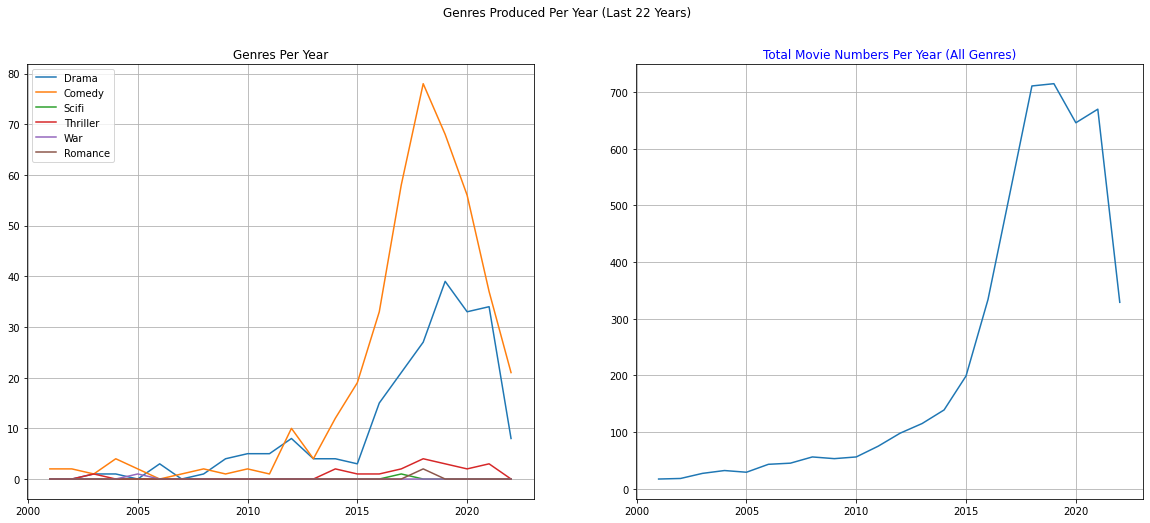

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
fig.suptitle('Genres Produced Per Year (Last 22 Years)')
plt.title('Total Movie Numbers Per Year (All Genres)', color='b')
ax1.plot(df11.index[-22:],df11.Drama[-22:],label='Drama')
ax1.plot(df11.index[-22:],df11.Comedy[-22:],label='Comedy')
ax1.plot(df11.index[-22:],df11.Scifi[-22:],label='Scifi')
ax1.plot(df11.index[-22:],df11.Thriller[-22:],label='Thriller')
ax1.plot(df11.index[-22:],df11.War[-22:],label='War')
ax1.plot(df11.index[-22:],df11.Romance[-22:],label = 'Romance')
ax1.set_title('Genres Per Year')
ax1.legend()
ax1.grid()
ax2.grid()
ax2.plot(df11.index[-22:],peryear[-22:])


**The number of shows produced are shown above. The harsh effect of COVID-19 is seen on these charts very well. The number of shows produced plummeted after 2020.**

In [14]:
df.head(3)

,Title,Release_Year,Genres,Production_Countries,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score,Average_Rating,Approval Points
1,Taxi Driver,1976,"Drama, Crime",US,8.2,808582.0,40.965,8.179,8.200331,6630707.5
2,Deliverance,1972,"Drama, Action, Thriller, European",US,7.7,107673.0,10.010,7.300,7.700157,829155.2
3,Monty Python and the Holy Grail,1975,"Fantasy, Action, Comedy",GB,8.2,534486.0,15.461,7.811,8.200106,4382906.0


In [15]:
k=[]
for i in df1.iloc[:2000].Genres:
     k.append(i)
genrelist = list(set(','.join(k).replace(',',', ').replace(' ','').split(',')))

**I extract all genre types in the first 2000 rows.**

In [16]:
Avg_Imdb=[]
count=[]
Avg_Tmdb=[]
Approval = []
Imdb_vote = []
for gnr in genrelist:
    count.append(df1[df1.Genres.str.contains(gnr)==True]['Title'].count())
    Avg_Imdb.append(df1[df1.Genres.str.contains(gnr)==True]['Imdb_Score'].mean())
    Avg_Tmdb.append(df1[df1.Genres.str.contains(gnr)==True]['Tmdb_Score'].mean())
    Imdb_vote.append(round(df1[df1.Genres.str.contains(gnr)==True]['Imdb_Votes'].mean(),2))
    Approval.append(round(df1[df1.Genres.str.contains(gnr)==True]['Approval Points'].mean(),0))

data = {'Count':count,'Imdb_avg':Avg_Imdb,'Tmdb_avg':Avg_Tmdb,'Approval':Approval,'Imdb_Vote':Imdb_vote}
df22 = pd.DataFrame(data,index=genrelist)
df22


,Count,Imdb_avg,Tmdb_avg,Approval,Imdb_Vote
,2000,6.875400,6.980763,450846.0,60451.73
History,150,7.304000,7.238247,371099.0,49758.55
War,91,7.228571,7.198582,567899.0,75499.64
Western,24,6.945833,6.959042,1142690.0,146448.17
Family,175,6.773143,7.230777,264063.0,37396.39
Comedy,779,6.866110,6.950684,310074.0,43162.44
Music,61,7.114754,7.168984,511532.0,62456.92
European,195,6.950256,6.913549,544822.0,72672.62
Reality,28,7.317857,7.252143,126729.0,16488.96
Sport,67,7.156716,7.277448,385053.0,49937.21


**The data frame shows the aggregate numbers per genre.**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


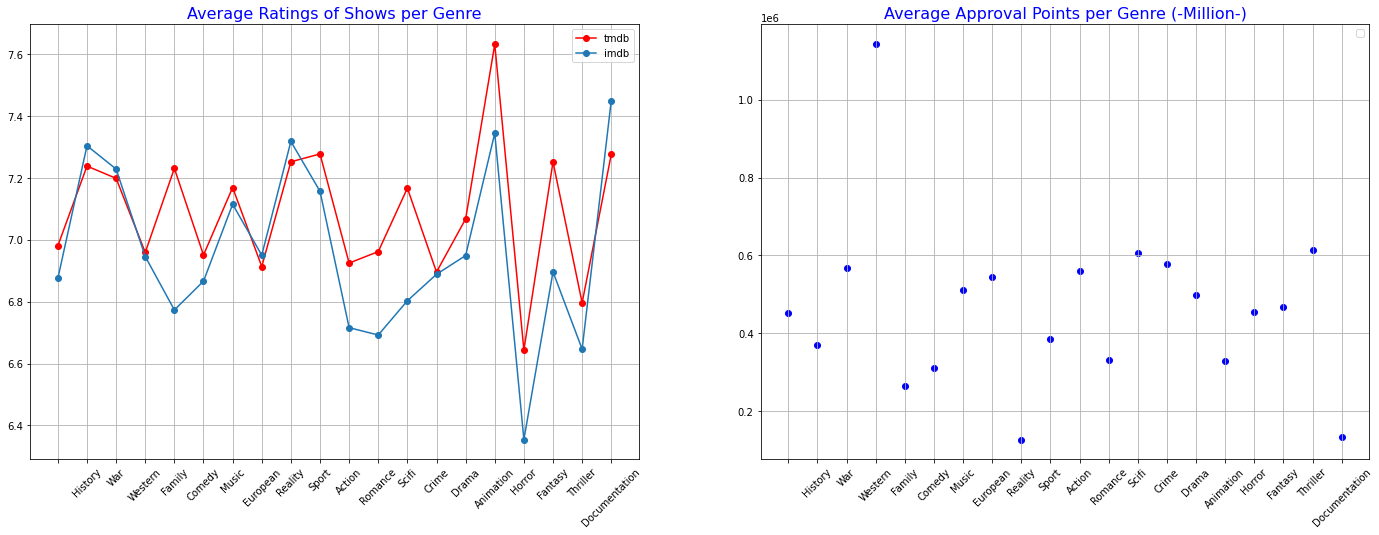

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
ax1.set_title('Average Ratings of Shows per Genre',size=16,color='b')
ax1.plot(df22.index,df22.Tmdb_avg,marker='o',color='r',label='tmdb')
ax1.plot(df22.index,df22.Imdb_avg,marker='o',label ='imdb')
ax1.set_xticklabels(df22.index, rotation=45)
ax1.grid()
ax1.legend()
ax2.set_title('Average Approval Points per Genre (-Million-)',size=16,color='b')

ax2.scatter(df22.index,df22.Approval,color='blue')
ax2.set_xticklabels(df22.index, rotation=45)
ax2.grid()
ax2.legend()


In [18]:
%%HTML
<div class='tableauPlaceholder' id='viz1656701838882' style='position: relative'><noscript><a href='#'><img alt='Sheet 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ne&#47;Netflixgenre_16558250788230&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Netflixgenre_16558250788230&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ne&#47;Netflixgenre_16558250788230&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1656701838882');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.4)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Here is a responsive wordcloud viz showing the number of shows per genre.**

In [19]:
df.head(3)

,Title,Release_Year,Genres,Production_Countries,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score,Average_Rating,Approval Points
1,Taxi Driver,1976,"Drama, Crime",US,8.2,808582.0,40.965,8.179,8.200331,6630707.5
2,Deliverance,1972,"Drama, Action, Thriller, European",US,7.7,107673.0,10.010,7.300,7.700157,829155.2
3,Monty Python and the Holy Grail,1975,"Fantasy, Action, Comedy",GB,8.2,534486.0,15.461,7.811,8.200106,4382906.0


In [20]:
df_success=df.groupby('Release_Year')['Average_Rating'].mean()
df_count=df.groupby('Release_Year').count()
df_success[df_success==df_success.max()]
df_count

,Title,Genres,Production_Countries,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score,Average_Rating,Approval Points
Release_Year,,,,,,,,,
1954,2,2,2,2,2,2,2,2,2
1956,1,1,1,1,1,1,1,1,1
1958,1,1,1,1,1,1,1,1,1
1959,1,1,1,1,1,1,1,1,1
1960,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
2018,711,711,711,711,711,711,711,711,711
2019,715,715,715,715,715,715,715,715,715
2020,646,646,646,646,646,646,646,646,646


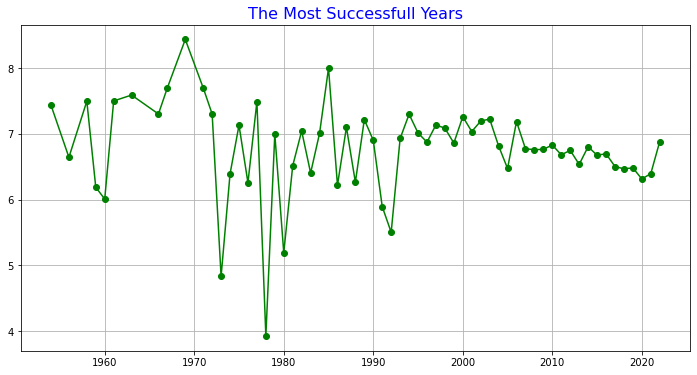

In [21]:
plt.figure(figsize=(12,6))
plt.title('The Most Successfull Years', size =16, color='b')
plt.grid()

plt.plot(df_success.index,df_success.values,marker='o',color = 'g')

The most successful year is 1985 with an average IMDB rating of 8.00. The interesting fact here is that the average rating **drops consistently** between **2000 and 2020**. The spike at the last tick might be the representation of the **psychological relief** after the COVID-19 pandemic. Another theory is that the content creators in the industry were not overwhelmed during the pandemic so the quality of the shows increased as the **total diligence and effort** put on a project increased.

In [22]:
df_popular=round(df.groupby('Release_Year')['Approval Points'].mean(),0)
print(df_popular[df_popular==df_popular.max()])

df_popular1=round(df.groupby('Release_Year')['Approval Points'].sum(),0)
print(df_popular1[df_popular1==df_popular1.max()])


Release_Year
1976    2212134.0
Name: Approval Points, dtype: float64
Release_Year
2017    62686813.0
Name: Approval Points, dtype: float64


Text(0.5, 1.0, 'Sum of Approval Points Per Year')

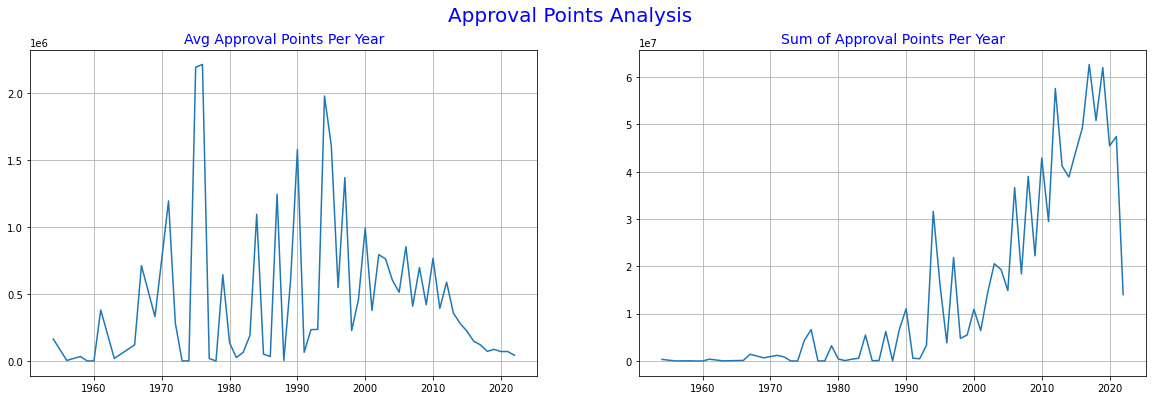

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
fig.suptitle('Approval Points Analysis',size=20,color='b')
ax1.plot(df_popular.index,df_popular.values)
ax1.grid()
ax1.set_title('Avg Approval Points Per Year',color='b',size=14)
ax2.plot(df_popular1.index,df_popular1.values)
ax2.grid()
ax2.set_title('Sum of Approval Points Per Year',color='b',size=14)


**As it can be seen 1976 seems to be the most successful/popular year on the right but, it is probably that a few state-of-art shows extraordinarily pushed the average up. When I summed up the approval points per year, 1976 is not even seen on the right chart.**

In [24]:
df1.head(3)

,Title,Release_Year,Genres,Production_Countries,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score,Average_Rating,Approval Points
237,Inception,2010,"Action, Scifi, Music, Thriller","US, GB",8.8,2294231.0,108.284,8.400,8.800364,20190142.4
97,Forrest Gump,1994,"Drama, Romance",US,8.8,2021343.0,63.449,8.478,8.800229,17788356.3
216,Breaking Bad,2008,"Drama, Crime, Thriller",US,9.5,1775990.0,353.848,8.790,9.501704,16875015.3


In [25]:
countryy = ''
for line in df1.Production_Countries:
    countryy= countryy + line.strip() + ','
    
countryy=list(set(countryy.strip().replace(' ','').split(',')))


In [26]:
avgimdb =[]
avgtmdb= []
countcont=[]
approval = []

for c in countryy:
    avgimdb.append(df1[df1.Production_Countries.str.contains(c)==True]['Imdb_Score'].mean())
    avgtmdb.append(df1[df1.Production_Countries.str.contains(c)==True]['Tmdb_Score'].mean())
    countcont.append(df1[df1.Production_Countries.str.contains(c)==True]['Imdb_Score'].count())
    approval.append(df1[df1.Production_Countries.str.contains(c)==True]['Approval Points'].mean())

    
cnt1=round(pd.DataFrame({'Average_Imdb':avgimdb,'Average_Tmdb':avgtmdb,'Count':countcont,'ApprovalP':approval},index = countryy).dropna(),1)
cnt1.sort_values('ApprovalP')

,Average_Imdb,Average_Tmdb,Count,ApprovalP
GE,7.4,6.9,1,28625.8
LB,7.6,7.3,1,32103.7
PT,7.9,7.0,1,32637.3
CU,8.2,7.7,1,39897.8
EG,7.4,7.4,6,42370.1
...,...,...,...,...
HU,6.9,6.9,6,1004898.5
AE,6.6,6.8,2,1040418.0
CZ,7.2,7.3,3,1935694.4
MT,6.3,6.4,2,1979815.6


In [27]:
cnt1=cnt1[cnt1.Count>10]


**I eliminate the countries that produced less than 11 shows for the sake of the visibility of my plots**

Text(0.5, 1.0, 'Average Tmdb Ratings per Country')

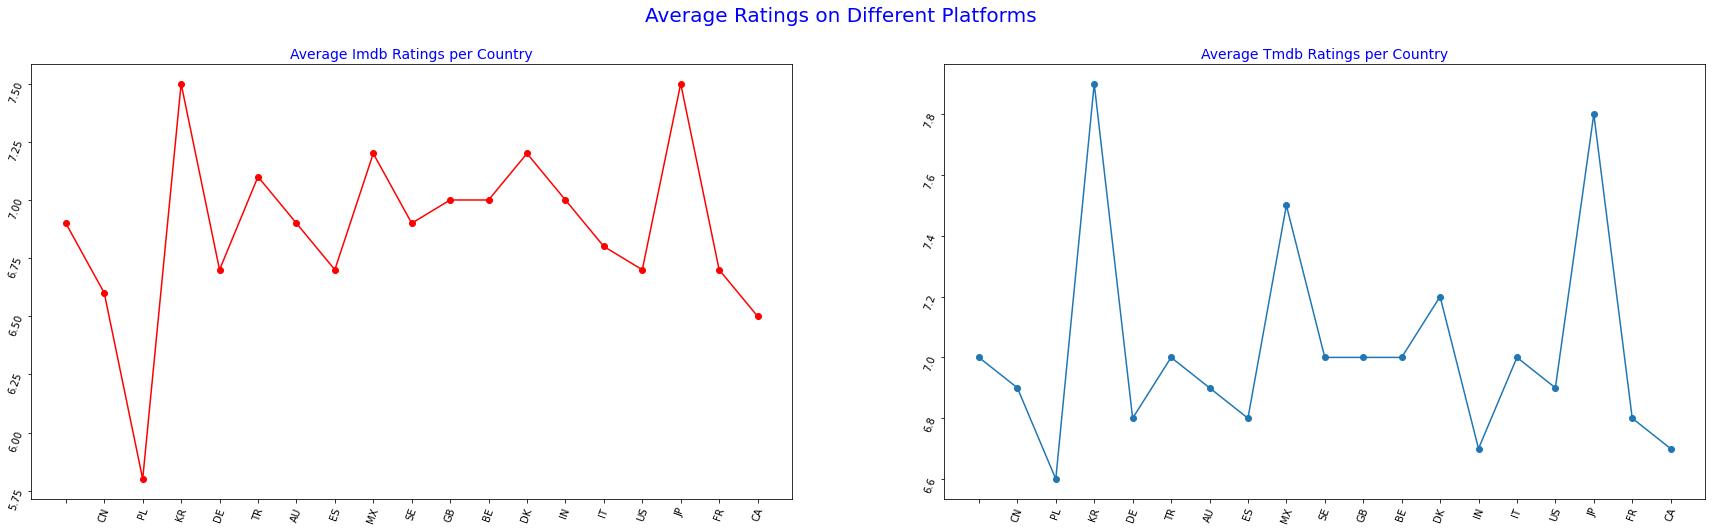

In [28]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(30,8))
fig.suptitle('Average Ratings on Different Platforms',color='b',size=20)
ax1.plot(cnt1.index,cnt1.Average_Imdb,marker='o',color='r')
ax1.tick_params(labelrotation=70)
ax1.set_title('Average Imdb Ratings per Country',size=14,color='b')
ax2.plot(cnt1.index,cnt1.Average_Tmdb,marker='o')
ax2.tick_params(labelrotation=70)
ax2.set_title('Average Tmdb Ratings per Country',size=14,color='b')

**IMDB and TMDB ratings show a significant correlation. According to the charts, Although Japan and South Korea produces less, they compete for the leadership in ratings, leaving a big gap between the closest follower.**

In [29]:
cnt1['ApprovalperShow'] = cnt1['ApprovalP']/cnt1['Count']
cnt1.sort_values('ApprovalperShow',ascending=False)


,Average_Imdb,Average_Tmdb,Count,ApprovalP,ApprovalperShow
MX,7.2,7.5,19,425842.5,22412.763158
DK,7.2,7.2,11,227238.9,20658.081818
IT,6.8,7.0,21,357431.6,17020.552381
DE,6.7,6.8,56,703654.7,12565.262500
CN,6.6,6.9,26,302413.8,11631.300000
BE,7.0,7.0,19,211014.9,11106.047368
AU,6.9,6.9,35,337335.5,9638.157143
PL,5.8,6.6,11,85968.0,7815.272727
SE,6.9,7.0,12,90731.4,7560.950000
FR,6.7,6.8,81,388738.0,4799.234568


**I added another column that shows the approval points per show to eradicate the effect of number of shows. The countries with high number of shows are likely to be left behind by others.**

In [30]:
%%HTML
<div class='tableauPlaceholder' id='viz1661879991945' style='position: relative'><noscript><a href='#'><img alt='DB1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ne&#47;Netflixgenre_16558250788230&#47;DB1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Netflixgenre_16558250788230&#47;DB1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ne&#47;Netflixgenre_16558250788230&#47;DB1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1661879991945');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='1020px';vizElement.style.maxWidth='1120px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='1020px';vizElement.style.maxWidth='1120px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1577px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Comments

With **big amount of consumption** options provided through platforms like Netflix, the quality of products started dropping.  Watching a show is easy, cheap, and fast which creates a **demand shock**, forcing the content creators to **produce more and faster** which potentially causes the quality to go down. The drop in ratings for the last 20 years proves it. This situation is a clear sign of the highly **industrialized show business.**

As for countries; countries with a high level of production show weakness in quality. Especially the product from **the U.S and India** bears extremely low ratings overall.
**Great Britain** draws attention with its numbers. It produces a considerable amount of shows and preserves a significant level of quality, -if we can assume that highly voted productions 
are considered high quality-
There is **a language barrier** for non-English shows. Since the majority of the world speaks English, there are limited people who can understand shows from other languages. Unless they exceed 
a certain level of quality, they are not worth being translated to English. So we could assume that non-English shows get into these lists with high ratings because they are already **proven successful by authorities** which is a kind of **self-filtering quality mechanism** for non-English products.